In [1]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df = pd.read_csv("StreamingHistory_Extended.csv")

print(df.head())
print(df.dtypes)


                     ts     username               platform  ms_played  \
0  2020-12-06T02:51:11Z  11145402699  iOS 14.2 (iPhone12,3)     145610   
1  2020-12-06T02:53:31Z  11145402699  iOS 14.2 (iPhone12,3)     138692   
2  2020-12-06T02:53:53Z  11145402699  iOS 14.2 (iPhone12,3)      22662   
3  2020-12-06T02:53:56Z  11145402699  iOS 14.2 (iPhone12,3)       2716   
4  2020-12-06T02:53:57Z  11145402699  iOS 14.2 (iPhone12,3)        116   

  conn_country user_agent_decrypted   master_metadata_track_name  \
0           AR              unknown   Hey Jude - Remastered 2015   
1           AR              unknown              Hacer un puente   
2           AR              unknown  Happy Together - Remastered   
3           AR              unknown                       Demons   
4           AR              unknown              Paint It, Black   

  master_metadata_album_artist_name master_metadata_album_album_name  \
0                       The Beatles                                1   
1 

C:\Users\49193660\AppData\Local\Temp\ipykernel_7824\1737300765.py:5: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StreamingHistory_Extended.csv")


In [4]:
#¿Que información contiene el dataset? Describir las columnas y los tipos de datos. Pista: ¿Son todas las columnas necesarias para el análisis? ¿Son todos los registros del mismo tipo?
import pandas as pd

df = pd.read_csv("StreamingHistory_Extended.csv")
print(df.info())
print(df.head())


C:\Users\49193660\AppData\Local\Temp\ipykernel_7824\4210619023.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("StreamingHistory_Extended.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125349 entries, 0 to 125348
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   ts                                 125349 non-null  object
 1   username                           125349 non-null  int64 
 2   platform                           125349 non-null  object
 3   ms_played                          125349 non-null  int64 
 4   conn_country                       125349 non-null  object
 5   user_agent_decrypted               104897 non-null  object
 6   master_metadata_track_name         123953 non-null  object
 7   master_metadata_album_artist_name  123953 non-null  object
 8   master_metadata_album_album_name   123953 non-null  object
 9   spotify_track_uri                  123953 non-null  object
 10  episode_name                       168 non-null     object
 11  episode_show_name                  168 non-null     

In [5]:
#¿A partir de que fecha se registraron las reproducciones? ¿Hasta que fecha?
#to_datetime es una funcion de pandas que la usamos para pasar los milisegundos de la columna ts a datetime, fecha y hora
df["ts"] = pd.to_datetime(df["ts"])
print("Desde:", df["ts"].min())
print(" Hasta:", df["ts"].max())

Desde: 2014-06-27 18:01:15+00:00
 Hasta: 2024-05-23 23:56:20+00:00


In [6]:
#¿Cuántas canciones diferentes se escucharon en total?
# Filtrar solo canciones (descartar podcasts)
df_canciones = df[df["is_podcast"] != True]

# Contar las canciones diferentes
canciones_unicas = df_canciones["master_metadata_track_name"].nunique()

#nunique evita canciones repetidas (valores unicos)
print("Canciones diferentes escuchadas:", canciones_unicas)


Canciones diferentes escuchadas: 9708


In [7]:
#¿Cuánto es la duración total de las reproducciones de canciones registradas? Pista: ¿Alguna columna del dataset indica la duración de la reproducción?
#la columna ms_played indica la duración de la reproducción en milisegundos
ms_totales = df_canciones["ms_played"].sum()
#sum es una funcion de pandas que suma todos los valores de la columna ms_played
#en minutos
ms_totales_minutos = ms_totales / (1000 * 60)
#print("Duración total de reproducciones de canciones (en minutos):", ms_totales_minutos)
#round es una funcion de python que redondea el numero a 2 decimales
redondeado = round(ms_totales_minutos, 2)
print ("Duración total de reproducciones de canciones (en minutos):", redondeado)




Duración total de reproducciones de canciones (en minutos): 207998.66


In [8]:
#¿Cuál es el artista más escuchado por tiempo total de reproducción?
df_artistas = df_canciones.groupby("master_metadata_album_artist_name")["ms_played"].sum().reset_index()
#reset_index() es una funcion de pandas que convierte el índice en una columna normal
df_artistas = df_artistas.sort_values(by="ms_played", ascending=False)
#sort_values es una funcion de pandas que ordena los valores de la columna ms_played de mayor a menor
artista_mas_escuchado = df_artistas.iloc[0]
#df_artistas.iloc[0] es una funcion de pandas que devuelve la primera fila del dataframe df_artistas
print("Artista:", artista_mas_escuchado["master_metadata_album_artist_name"])
#Ejercicio 7 El artista más escuchado (por tiempo reproducido), ¿cuál es la canción más escuchada?
cancion_mas_escuchada = df_canciones[df_canciones["master_metadata_album_artist_name"] == artista_mas_escuchado["master_metadata_album_artist_name"]]
cancion_mas_escuchada = cancion_mas_escuchada.groupby("master_metadata_track_name")["ms_played"].sum().reset_index()
cancion_mas_escuchada = cancion_mas_escuchada.sort_values(by="ms_played", ascending=False)
cancion_mas_escuchada = cancion_mas_escuchada.iloc[0]
print("Canción más escuchada:", cancion_mas_escuchada["master_metadata_track_name"])



Artista: Charly García
Canción más escuchada: Hablando a Tu Corazón


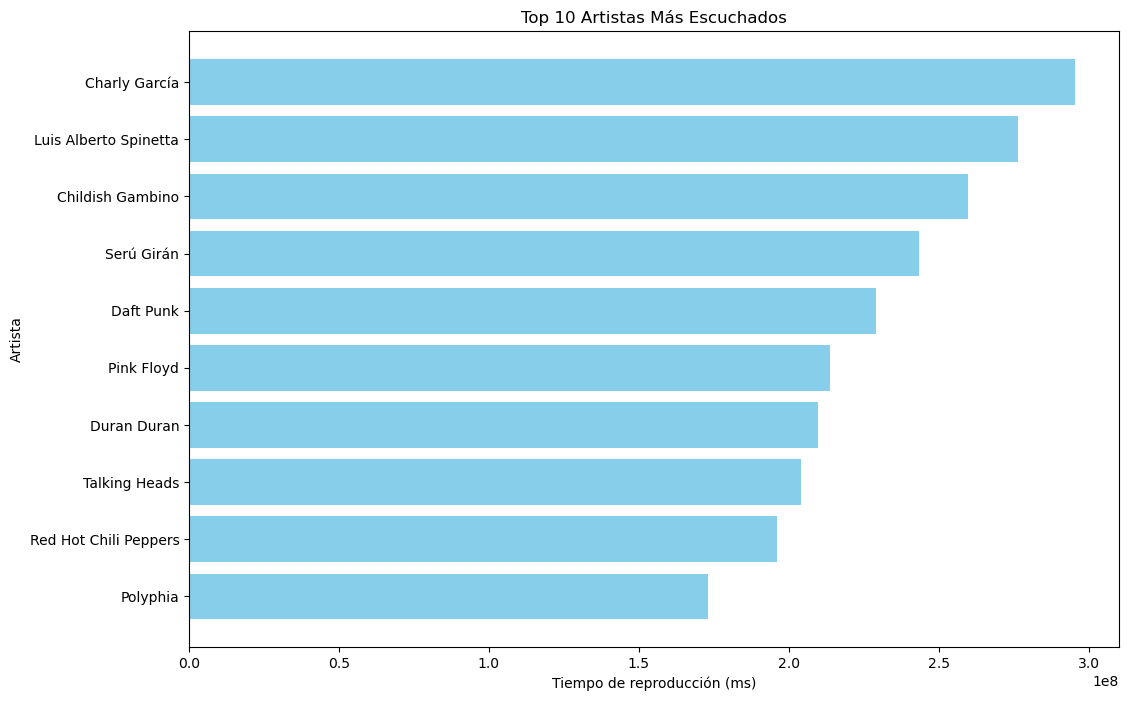

In [ ]:
#Determinar el top 10 de artistas más escuchados . Elegir un tipo de gráfico adecuado para visualizar los resultados.
top_artistas = df_artistas.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_artistas["master_metadata_album_artist_name"], top_artistas["ms_played"], color='skyblue')
plt.xlabel("Tiempo de reproducción (ms)")
plt.ylabel("Artista")
plt.title("Top 10 Artistas Más Escuchados")
plt.gca().invert_yaxis()  # Invertir el eje y para que el artista más escuchado esté en la parte superior
plt.show()
#plt.figure es una funcion de matplotlib que crea una figura nueva
#plt.barh es una funcion de matplotlib que crea un gráfico de barras horizontales
#plt.xlabel es una funcion de matplotlib que establece la etiqueta del eje x
#plt.ylabel es una funcion de matplotlib que establece la etiqueta del eje y
#plt.title es una funcion de matplotlib que establece el título del gráfico
#plt.gca().invert_yaxis() es una funcion de matplotlib que invierte el eje y para que el artista más escuchado esté en la parte superior
#figsize es un parametro de plt.figure que establece el tamaño de la figura en pulgadas (ancho, alto)





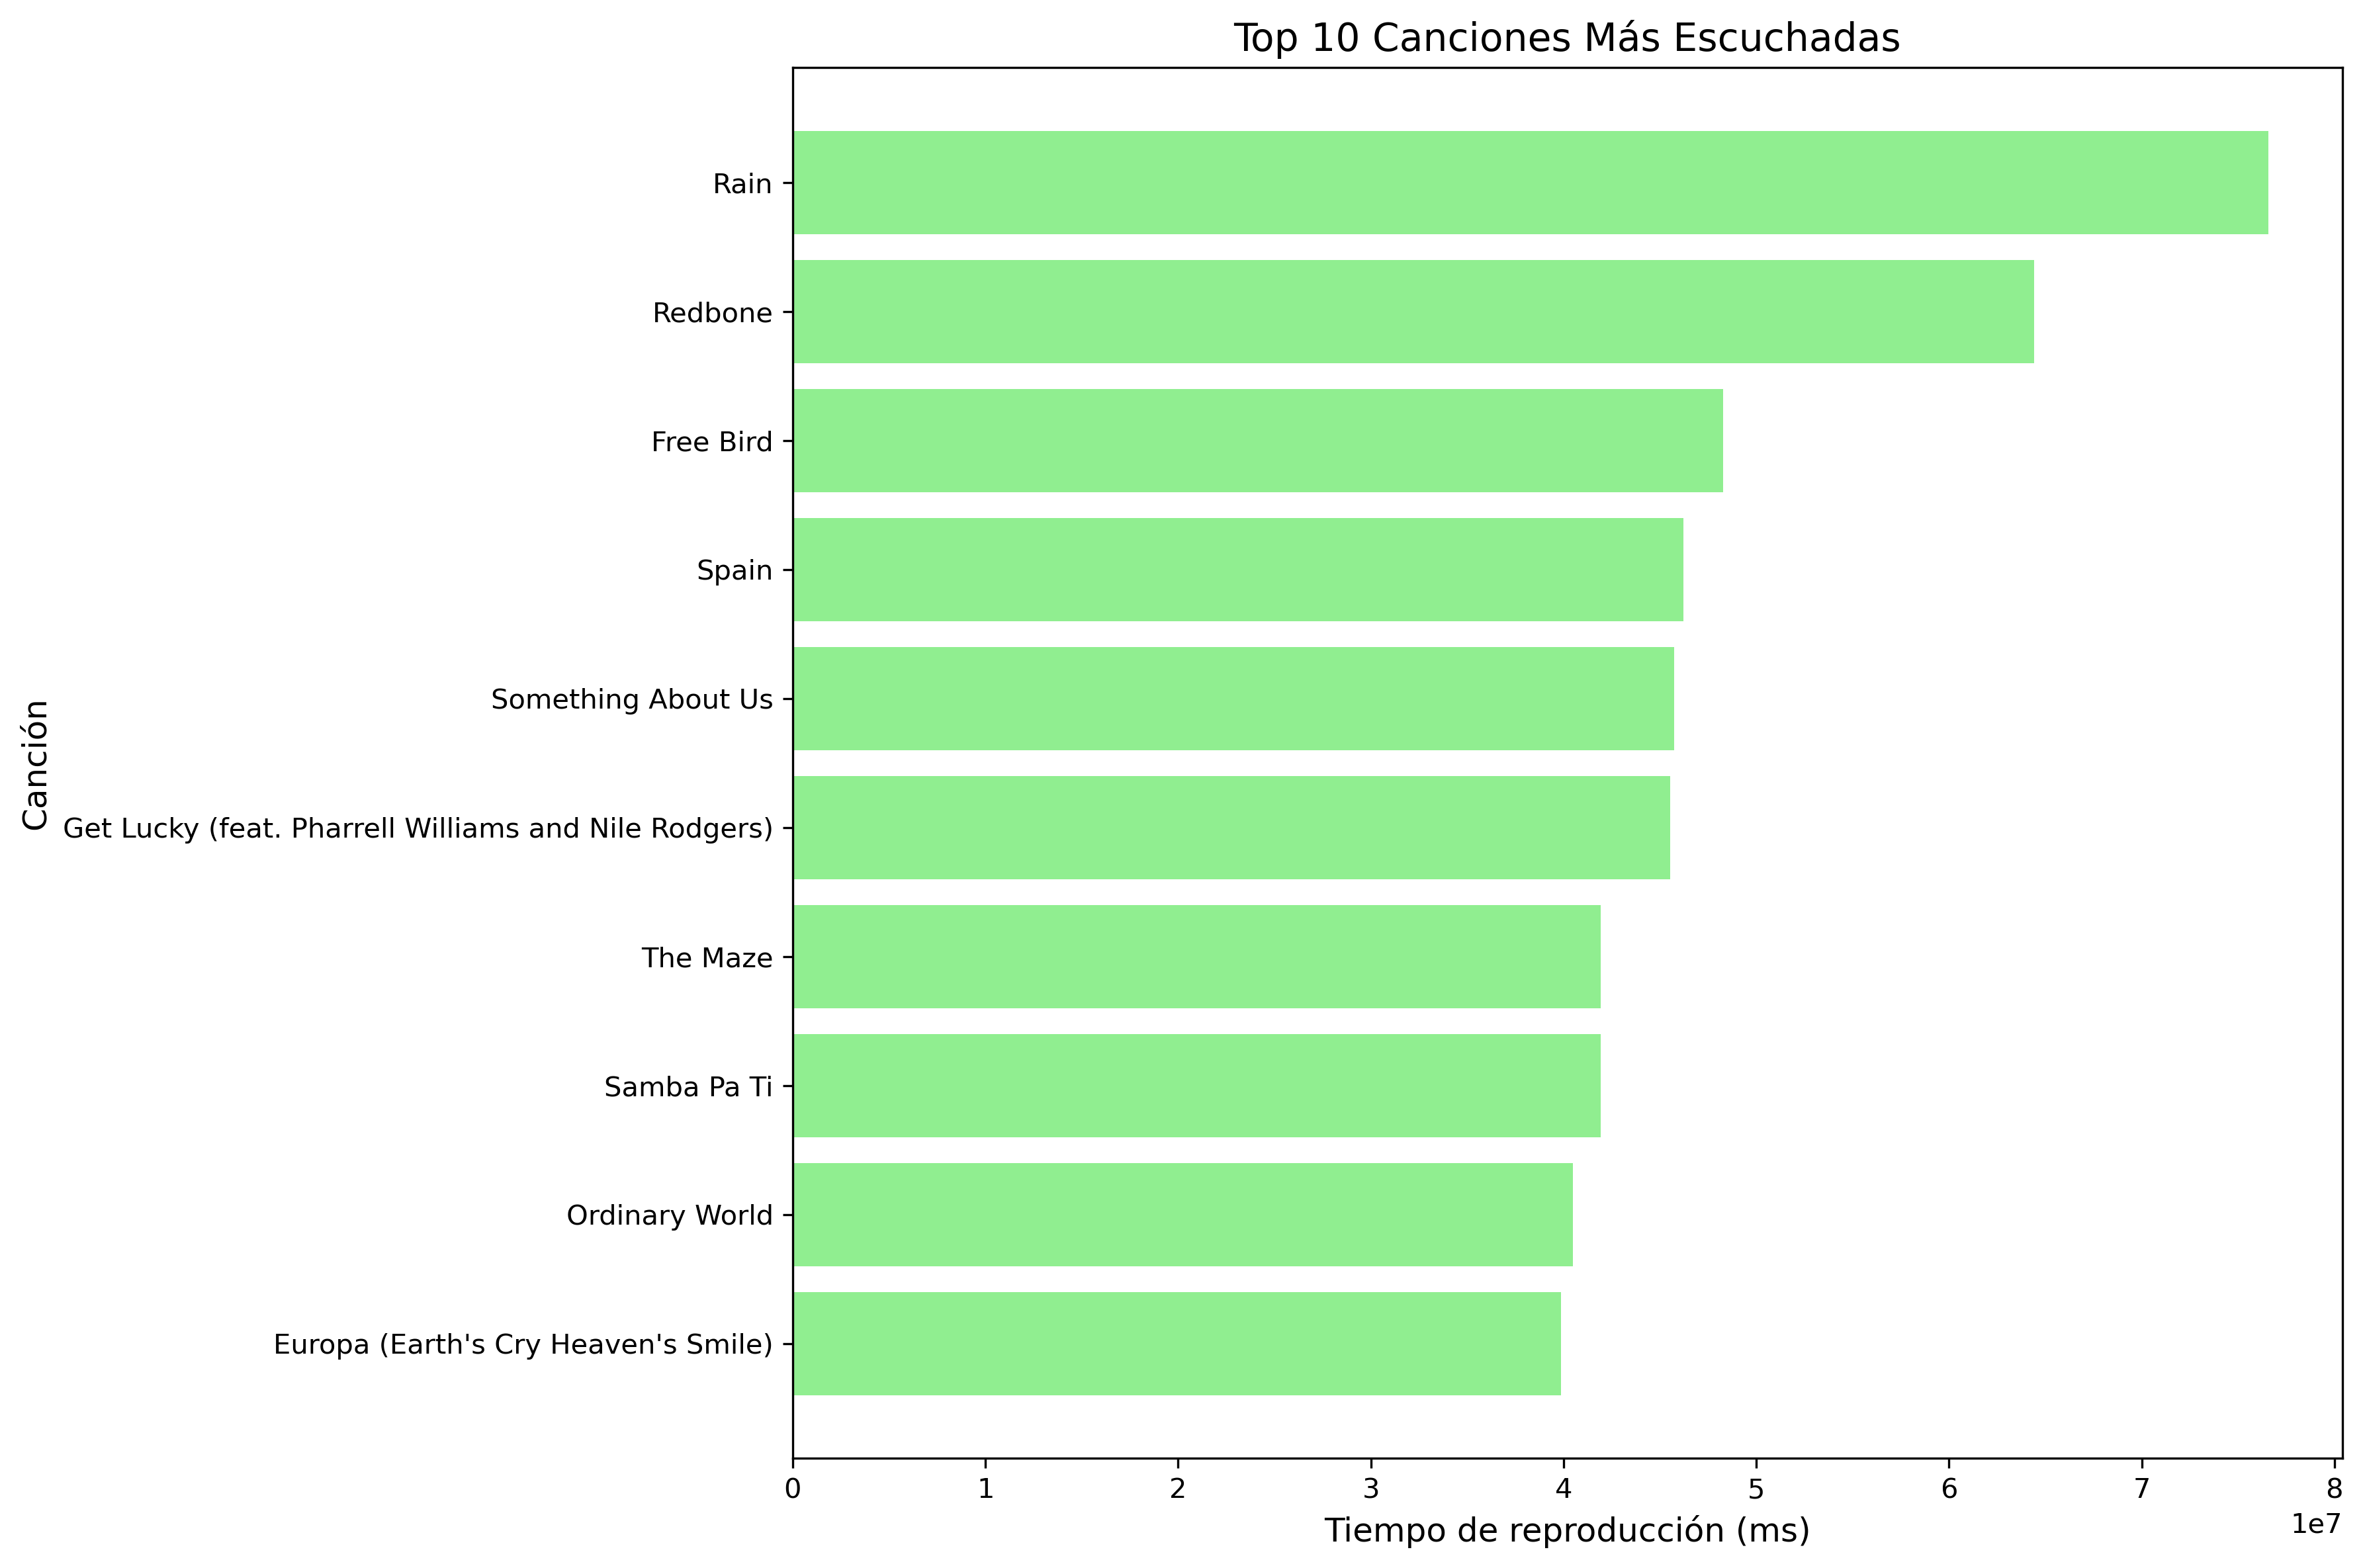

In [ ]:
# Agrupar y ordenar las canciones por tiempo de reproducción
top_canciones = df_canciones.groupby("master_metadata_track_name")["ms_played"].sum().reset_index()
top_canciones = top_canciones.sort_values(by="ms_played", ascending=False).head(10)

plt.figure(figsize=(12, 8), dpi=300)  # Aumentar el DPI para mejorar la calidad
plt.barh(top_canciones["master_metadata_track_name"], top_canciones["ms_played"], color='lightgreen')
plt.xlabel("Tiempo de reproducción (ms)", fontsize=12)
plt.ylabel("Canción", fontsize=12)
plt.title("Top 10 Canciones Más Escuchadas", fontsize=14)
plt.gca().invert_yaxis()  # Invertir el eje Y para que la canción más escuchada esté arriba
plt.tight_layout()  # Ajustar el diseño para evitar cortes en etiquetas o títulos
plt.show()

C:\Users\49193660\AppData\Local\Temp\ipykernel_7824\3710649270.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  reproducciones_por_mes = df.groupby(df["ts"].dt.to_period("M")).size().reset_index(name='reproducciones')


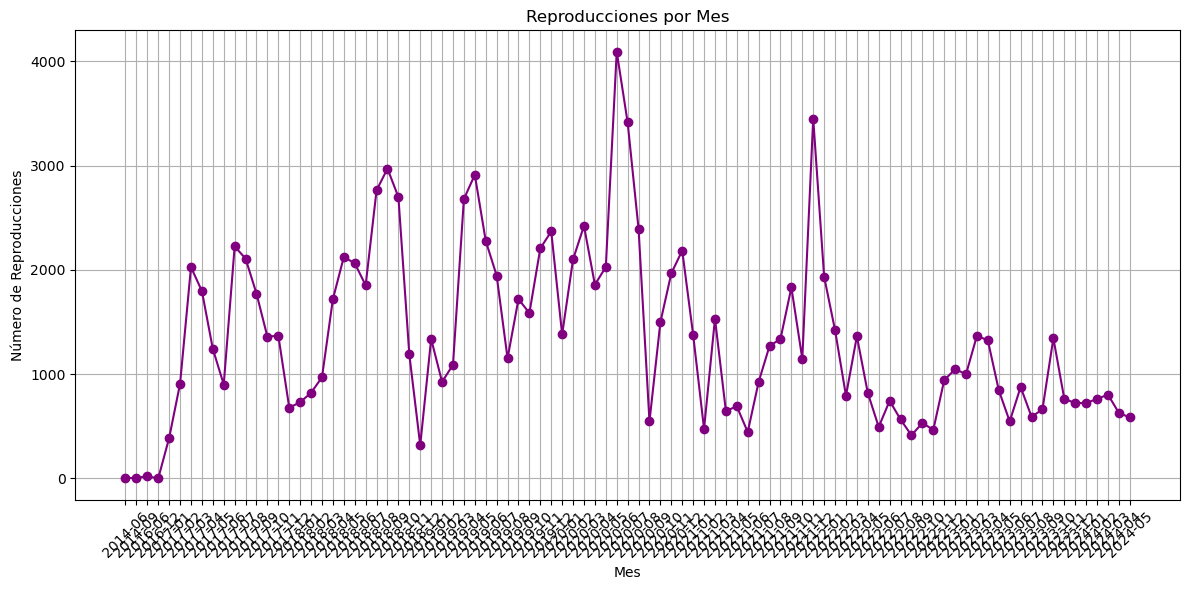

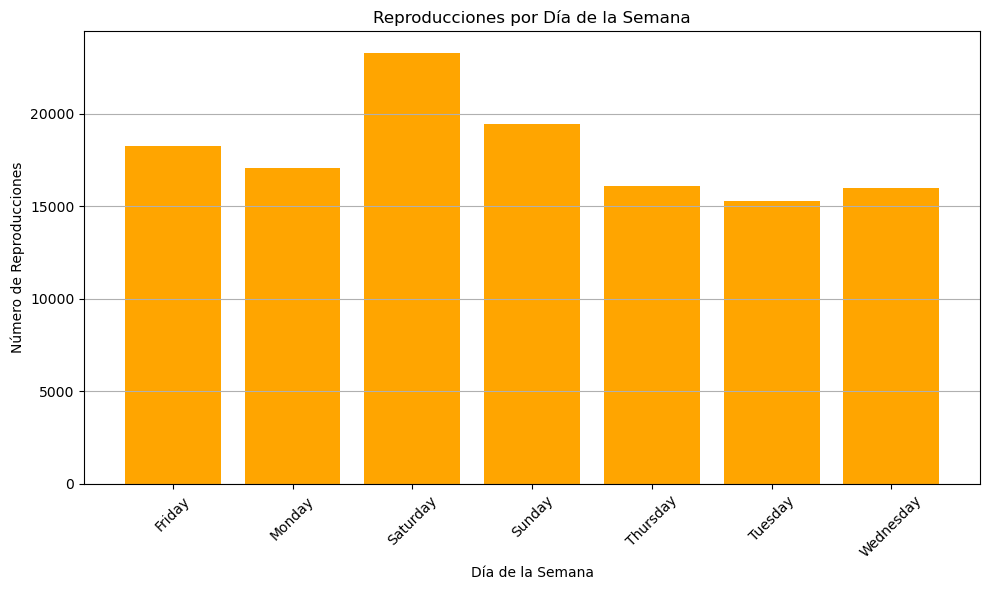

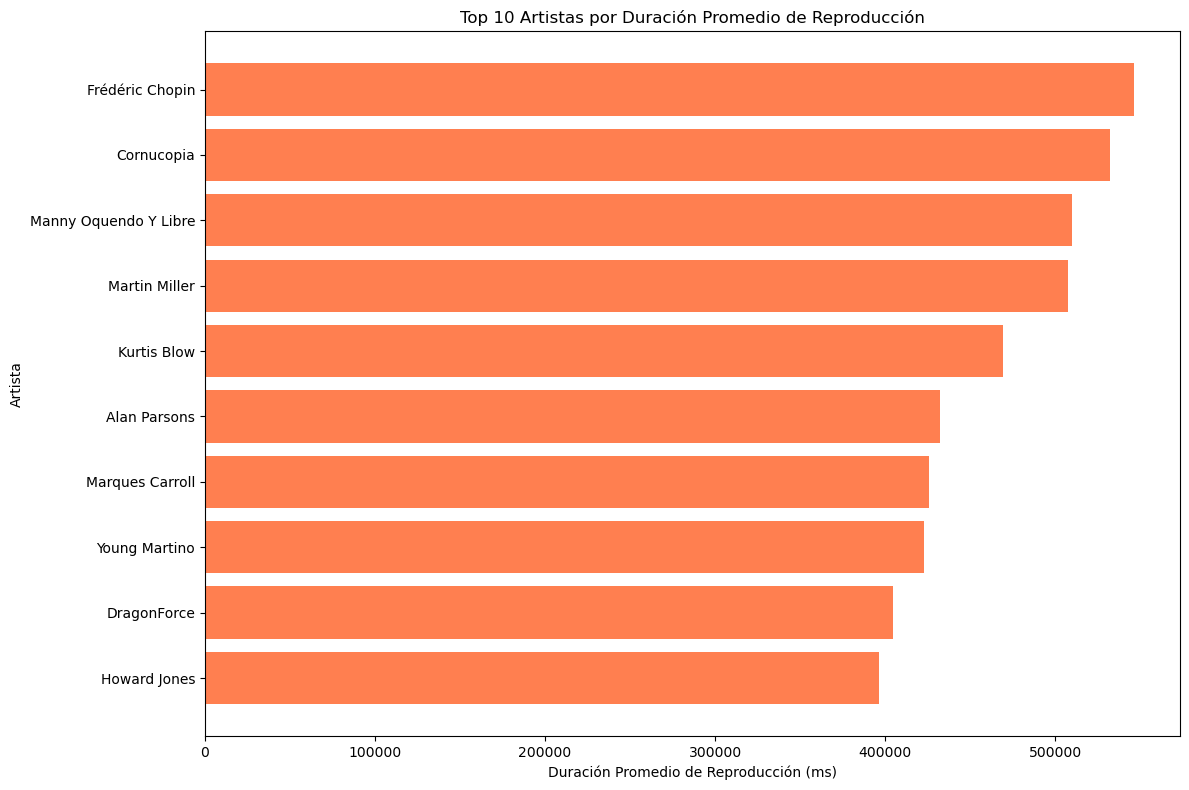

In [12]:
#Además se deben plantear al menos 3 análisis adicionales. Responderlas utilizando el dataset y acompañarlas con gráficos adecuados.
# Análisis adicional 1: ¿Cuántas reproducciones se realizaron por mes?
# Convertir la columna 'ts' a datetime si no se ha hecho ya
df["ts"] = pd.to_datetime(df["ts"])
# Agrupar por mes y contar las reproducciones
reproducciones_por_mes = df.groupby(df["ts"].dt.to_period("M")).size().reset_index(name='reproducciones')
plt.figure(figsize=(12, 6))
plt.plot(reproducciones_por_mes["ts"].astype(str), reproducciones_por_mes["reproducciones"], marker='o', color='purple')
plt.xlabel("Mes")
plt.ylabel("Número de Reproducciones")
plt.title("Reproducciones por Mes")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
# Análisis adicional 2: ¿Qué días de la semana se escuchó más música?
# Agrupar por día de la semana y contar las reproducciones
df["day_of_week"] = df["ts"].dt.day_name()
reproducciones_por_dia = df.groupby("day_of_week").size().reset_index(name='reproducciones')
# Ordenar los días de la semana
dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
reproducciones_por_dia["day_of_week"] = pd.Categorical(reproducciones_por_dia["day_of_week"], categories=dias_ordenados, ordered=True)
plt.figure(figsize=(10, 6))
plt.bar(reproducciones_por_dia["day_of_week"], reproducciones_por_dia["reproducciones"], color='orange')
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Reproducciones")
plt.title("Reproducciones por Día de la Semana")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
# Análisis adicional 3: ¿Cuál es la duración promedio de las reproducciones por artista?
# Agrupar por artista y calcular la duración promedio de las reproducciones
duracion_promedio_artista = df_canciones.groupby("master_metadata_album_artist_name")["ms_played"].mean().reset_index()
duracion_promedio_artista = duracion_promedio_artista.sort_values(by="ms_played", ascending=False).head(10)
plt.figure(figsize=(12, 8))
plt.barh(duracion_promedio_artista["master_metadata_album_artist_name"], duracion_promedio_artista["ms_played"], color='coral')
plt.xlabel("Duración Promedio de Reproducción (ms)")
plt.ylabel("Artista")
plt.title("Top 10 Artistas por Duración Promedio de Reproducción")
plt.gca().invert_yaxis()  # Invertir el eje Y para que el artista con mayor duración promedio esté arriba
plt.tight_layout()
plt.show()


